# Analyzing Selfplay Data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aegomoku.gomoku_board import GomokuBoard
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example
from pathlib import Path

import os

2022-09-27 08:07:03.883321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# The Data

In [3]:
PHASE = '0'
HOST = os.uname()[1]
SELFPLAY_DATA=Path('../DATA/selfplay')
print(os.listdir(SELFPLAY_DATA))

['new.pickle']


In [4]:
a_pickle = SELFPLAY_DATA / 'new.pickle'
filename = a_pickle.resolve().as_posix()
filename

'/Users/wgiersche/workspace/Project-Ellie/DeepGomoku/DATA/selfplay/new.pickle'

In [5]:
examples, games = read_training_data(filename)
len(games), len(examples), len(examples[0]), examples[0][0].shape

(40, 13264, 3, (21, 21, 3))

#### Game Info
Player name from `gameplay_params.yaml` and all moves

In [6]:
BOARD_SIZE = 19
board = GomokuBoard(BOARD_SIZE)
for game in games:
    print(f"{game[0]} begins with black")
    print([board.Stone(i) for i in game[1]])

P400_1.5 begins with black
[J9, H8, J10, H9, J8, J11, J6, J7, H10, I10, I9, K7, G11, F12, G8, G10, F11, K6, I8, H7, I7, H6, H5, K9, I5, I6, K5, J5, K8, M8, L7, L3, K4, M6, M3, L4, K10, K12, L13, L11, M10, K11, I11, N11, M11, E11, N10, L10, K13, J12, L12, J14, O9]
P200_1.0 begins with black
[L9, L11, I12, K10, J9, K9, K8, M10, I10, H11, M6, L7, I11, I14, K12, M12, I13, I9, M14, O14, N13, L13, L15, O12, K16, J17, K14, M16, L12, H12, H9, N15, L17, P13, Q12, N11, Q14, O10, P9, N10, L10, Q10, P10, O11, O13, M11, K11, P11]
P400_1.5 begins with black
[K9, J11, I12, L9, K10, K11, I11, J10, I9, I10, H9, J9, J8, J12, J13, L10, I13, H11, G12, K8, L7, L13, H10, L11, L12, K12, M14, M11, N11, N8, M9, G11, L6, K7, K14, L15, I15, I14, L14, O14, J14, N14, K13, H16, H13, G13, F11, J7, I6, K6, L5, K4, K5, L8, L4, L3, I7, O8, M8, N9, M10, N5, J6, M3, H8]
P200_1.0 begins with black
[J9, I10, J12, I9, I8, J10, K10, H7, K11, I13, I11, H10, G11, H11, H8, G10, F10, J8, K7, K9, I7, G9, E8, G8, I6, G6, G7, H12, 

---

## Data Verification
We have records from those games in 8 symmetries. Now we skim through a good chunk of training records to check whether it makes sense (to some degree).

### Compare with the original policy's estimate
The tree search results in less, but more refined options

10336
Next to play: WHITE
Value from WHITE's point of view: -0.06044058874249458
Next to play: WHITE
Value from WHITE's point of view: -0.08688399195671082


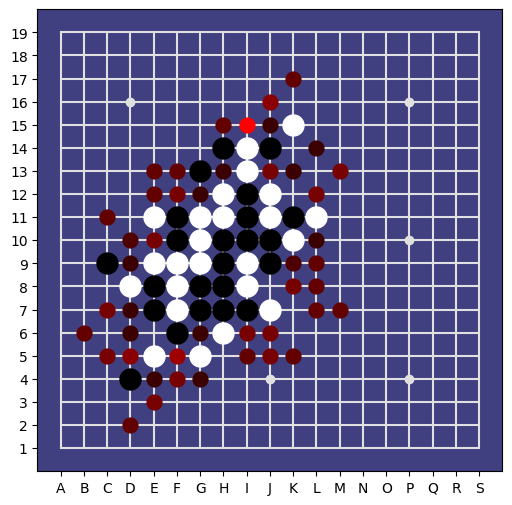

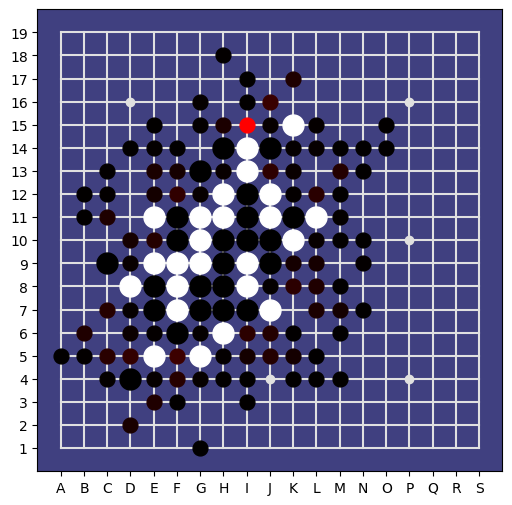

In [9]:
from aegomoku.interfaces import GAMESTATE_NORMAL
from aegomoku.gomoku_game import Swap2
import random
from aegomoku.policies.topological_value import TopologicalValuePolicy

n = random.randint(0, len(examples))
#n = 4688
print(n)
example = examples[n]
analyse_example(example, policy_cutoff=1, disp_width=6)

game = Swap2(board_size=BOARD_SIZE)
policy = TopologicalValuePolicy(game)
policy.compile()
s, _, _ = example
p, v = policy.advise((s, GAMESTATE_NORMAL))
analyse_example((s, p, v), policy_cutoff=1, disp_width=6)

# Policy values explicit on a scale 0-99

In [11]:
import numpy as np
print((p[:-1].reshape((BOARD_SIZE, BOARD_SIZE)) * 99 / np.max(p)).astype(int))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  9 99  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  1  2  0  1  0  0  0  0  0]
 [ 0  0  1  0  9  7  0  2  0 16  3  0 12  0  0  0  0  0  0]
 [ 0  0  1  0  7 17  2  0  0  0  1 15  1  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  7 13  0  0  0  0  0  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  7  8  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 15 11  1  0  0  0  0  0  0]
 [ 0  0 13  2  0  0  0  0  0  0  0  9  7  1  0  0  0  0  0]
 [ 0 11  0  4  1  0  2  0 15 13  1  0  0  0  0  0  0  0  0]
 [ 1  1 14 18  0 21  0  1  7 13  7  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  2 13  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0

# Advice is typically a parameterized subset of all probabilities.
Attention: This is a bias trap!

In [13]:
advisable = policy.get_advisable_actions((s, GAMESTATE_NORMAL),
                                         cut_off=.1, percent_secondary=0,
                                         min_secondary=0)
print([board.Stone(i) for i in advisable])

[K17, J16, H15, I15, J13, M13, F12, L12, C11, E10, K8, L8, C7, B6, I6, J6, C5, D5, F5, J5, F4, E3]
